In [140]:
import itertools
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.ensemble import IsolationForest

In [10]:
sample = pd.read_csv('data/sample.csv')
train = pd.read_csv('data/train_data.csv')
test0 = pd.read_csv('./data/test_data/00_test.csv')
test1 = pd.read_csv('./data/test_data/01_test.csv')
test2 = pd.read_csv('./data/test_data/02_test.csv')

train.head(10)

,time,00,01,02,04,05,06,07,08,09,10,11,12,13,15,16,17,18
0,0.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
1,1.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
2,2.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
3,3.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
4,4.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
5,5.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
6,6.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
7,7.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
8,8.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0
9,9.0,0.0,283.149994,273.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.1,100.0,0.0


In [107]:
sample.head(4)

,id,time
0,0,87660.0
1,1,87135.0
2,2,88762.0
3,3,90557.0


In [108]:
for column in train.columns:
    print(column, train[column].nunique(), end='| ')
train.describe()

time 1511369| 00 172| 01 206070| 02 13593| 04 2| 05 203| 06 2| 07 163| 08 2| 09 2| 10 2| 11 2| 12 2055| 13 50459| 15 2| 16 93809| 17 2055| 18 203| 

,time,00,01,02,04,05,06,07,08,09,10,11,12,13,15,16,17,18
count,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06
mean,7.499097e+05,2.238748e+00,3.133293e+02,3.297380e+02,3.336551e-02,8.974604e-02,4.002494e-02,2.846333e+02,1.121959e-01,1.377607e-01,2.243919e+00,3.626952e-02,2.455065e-02,6.845107e+00,6.268951e-01,4.328986e-01,1.002455e+02,8.974604e-02
std,4.329780e+05,4.103912e-01,1.243922e+01,4.474176e+00,1.795892e-01,9.149957e-01,1.960178e-01,7.949223e+00,3.156075e-01,3.446488e-01,6.312149e+00,1.869601e-01,1.003082e+00,3.939373e+00,4.836298e-01,2.301305e-01,1.003082e+01,9.149957e-01
min,0.000000e+00,0.000000e+00,2.830333e+02,2.731500e+02,0.000000e+00,-2.550066e+00,0.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.211737e+00,1.000000e-02,0.000000e+00,9.999997e-02,6.788263e+01,-2.550066e+00
25%,3.747987e+05,1.947852e+00,3.026443e+02,3.301512e+02,0.000000e+00,-5.709403e-01,0.000000e+00,2.772906e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.451308e-01,3.438636e+00,0.000000e+00,1.000000e-01,9.354869e+01,-5.709403e-01
50%,7.497585e+05,2.301164e+00,3.144388e+02,3.302432e+02,0.000000e+00,1.375469e-01,0.000000e+00,2.843755e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.120029e-02,6.900535e+00,1.000000e+00,6.000000e-01,1.001120e+02,1.375469e-01
75%,1.124822e+06,2.624508e+00,3.249014e+02,3.302813e+02,0.000000e+00,7.714164e-01,0.000000e+00,2.907142e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.859645e-01,1.028763e+01,1.000000e+00,6.000000e-01,1.068596e+02,7.714164e-01
max,1.500000e+06,2.700000e+00,3.311366e+02,3.303026e+02,1.000000e+00,2.073183e+00,1.000000e+00,3.037318e+02,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,3.507157e+00,1.363493e+01,1.000000e+00,6.000000e-01,1.350716e+02,2.073183e+00


In [135]:
def plot_fig(data, columns=None):
    
    
    if columns != None:
        fig, axs = plt.subplots(3, 3, figsize=(16, 16))
        axs = axs.ravel()
        for i, column in enumerate(columns):
            if column == 'time':
                pass
            else:
                axs[i].plot(data['time'], data[column])
                axs[i].set_title(column)
        return

    fig, axs = plt.subplots(9, 2, figsize=(20, 60))
    axs = axs.ravel()
    for i, column in enumerate(data.columns):
        if column == 'time':
            pass
        else:
            axs[i - 1].plot(data['time'], data[column])
            axs[i - 1].set_title(column)

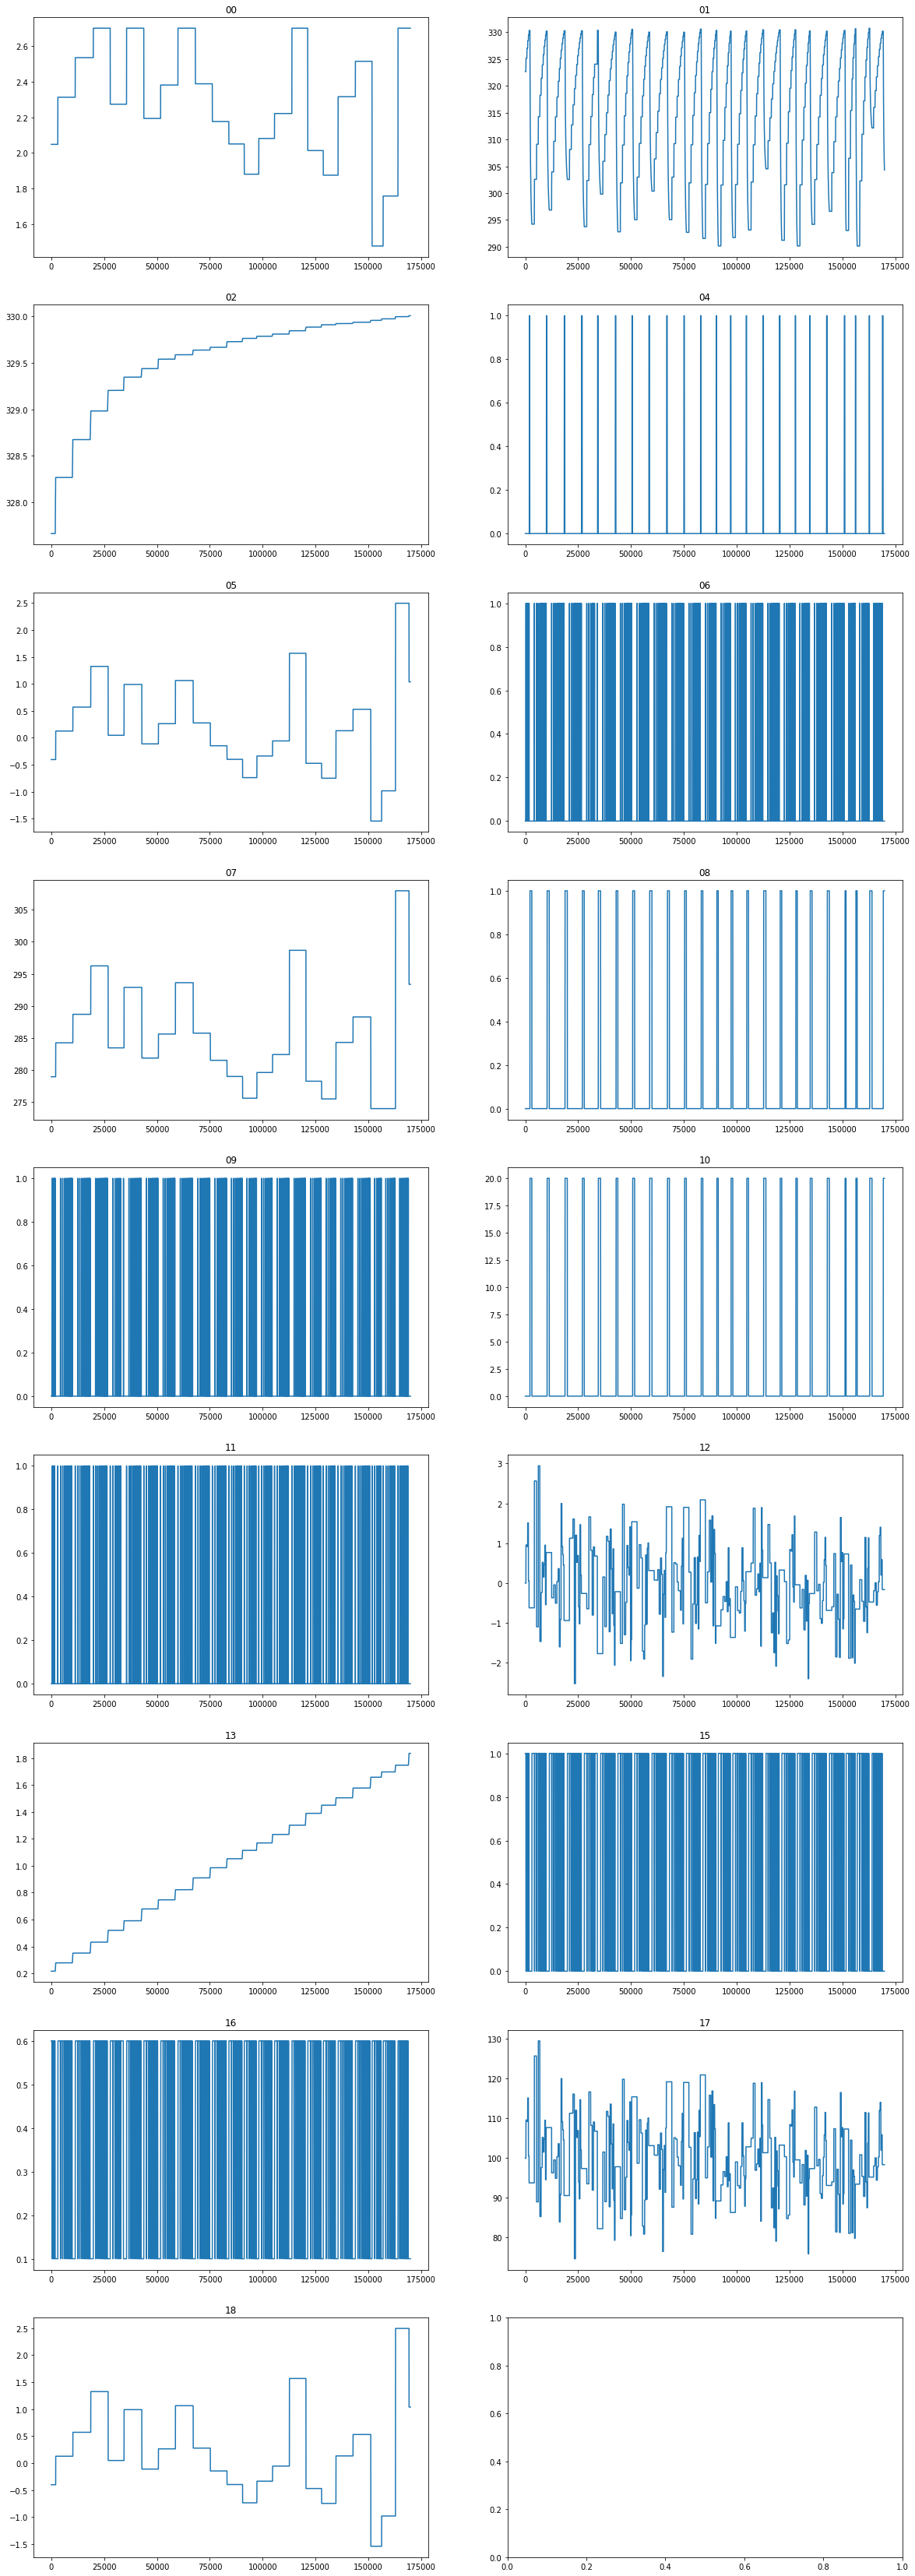

In [142]:
plot_fig(test1)

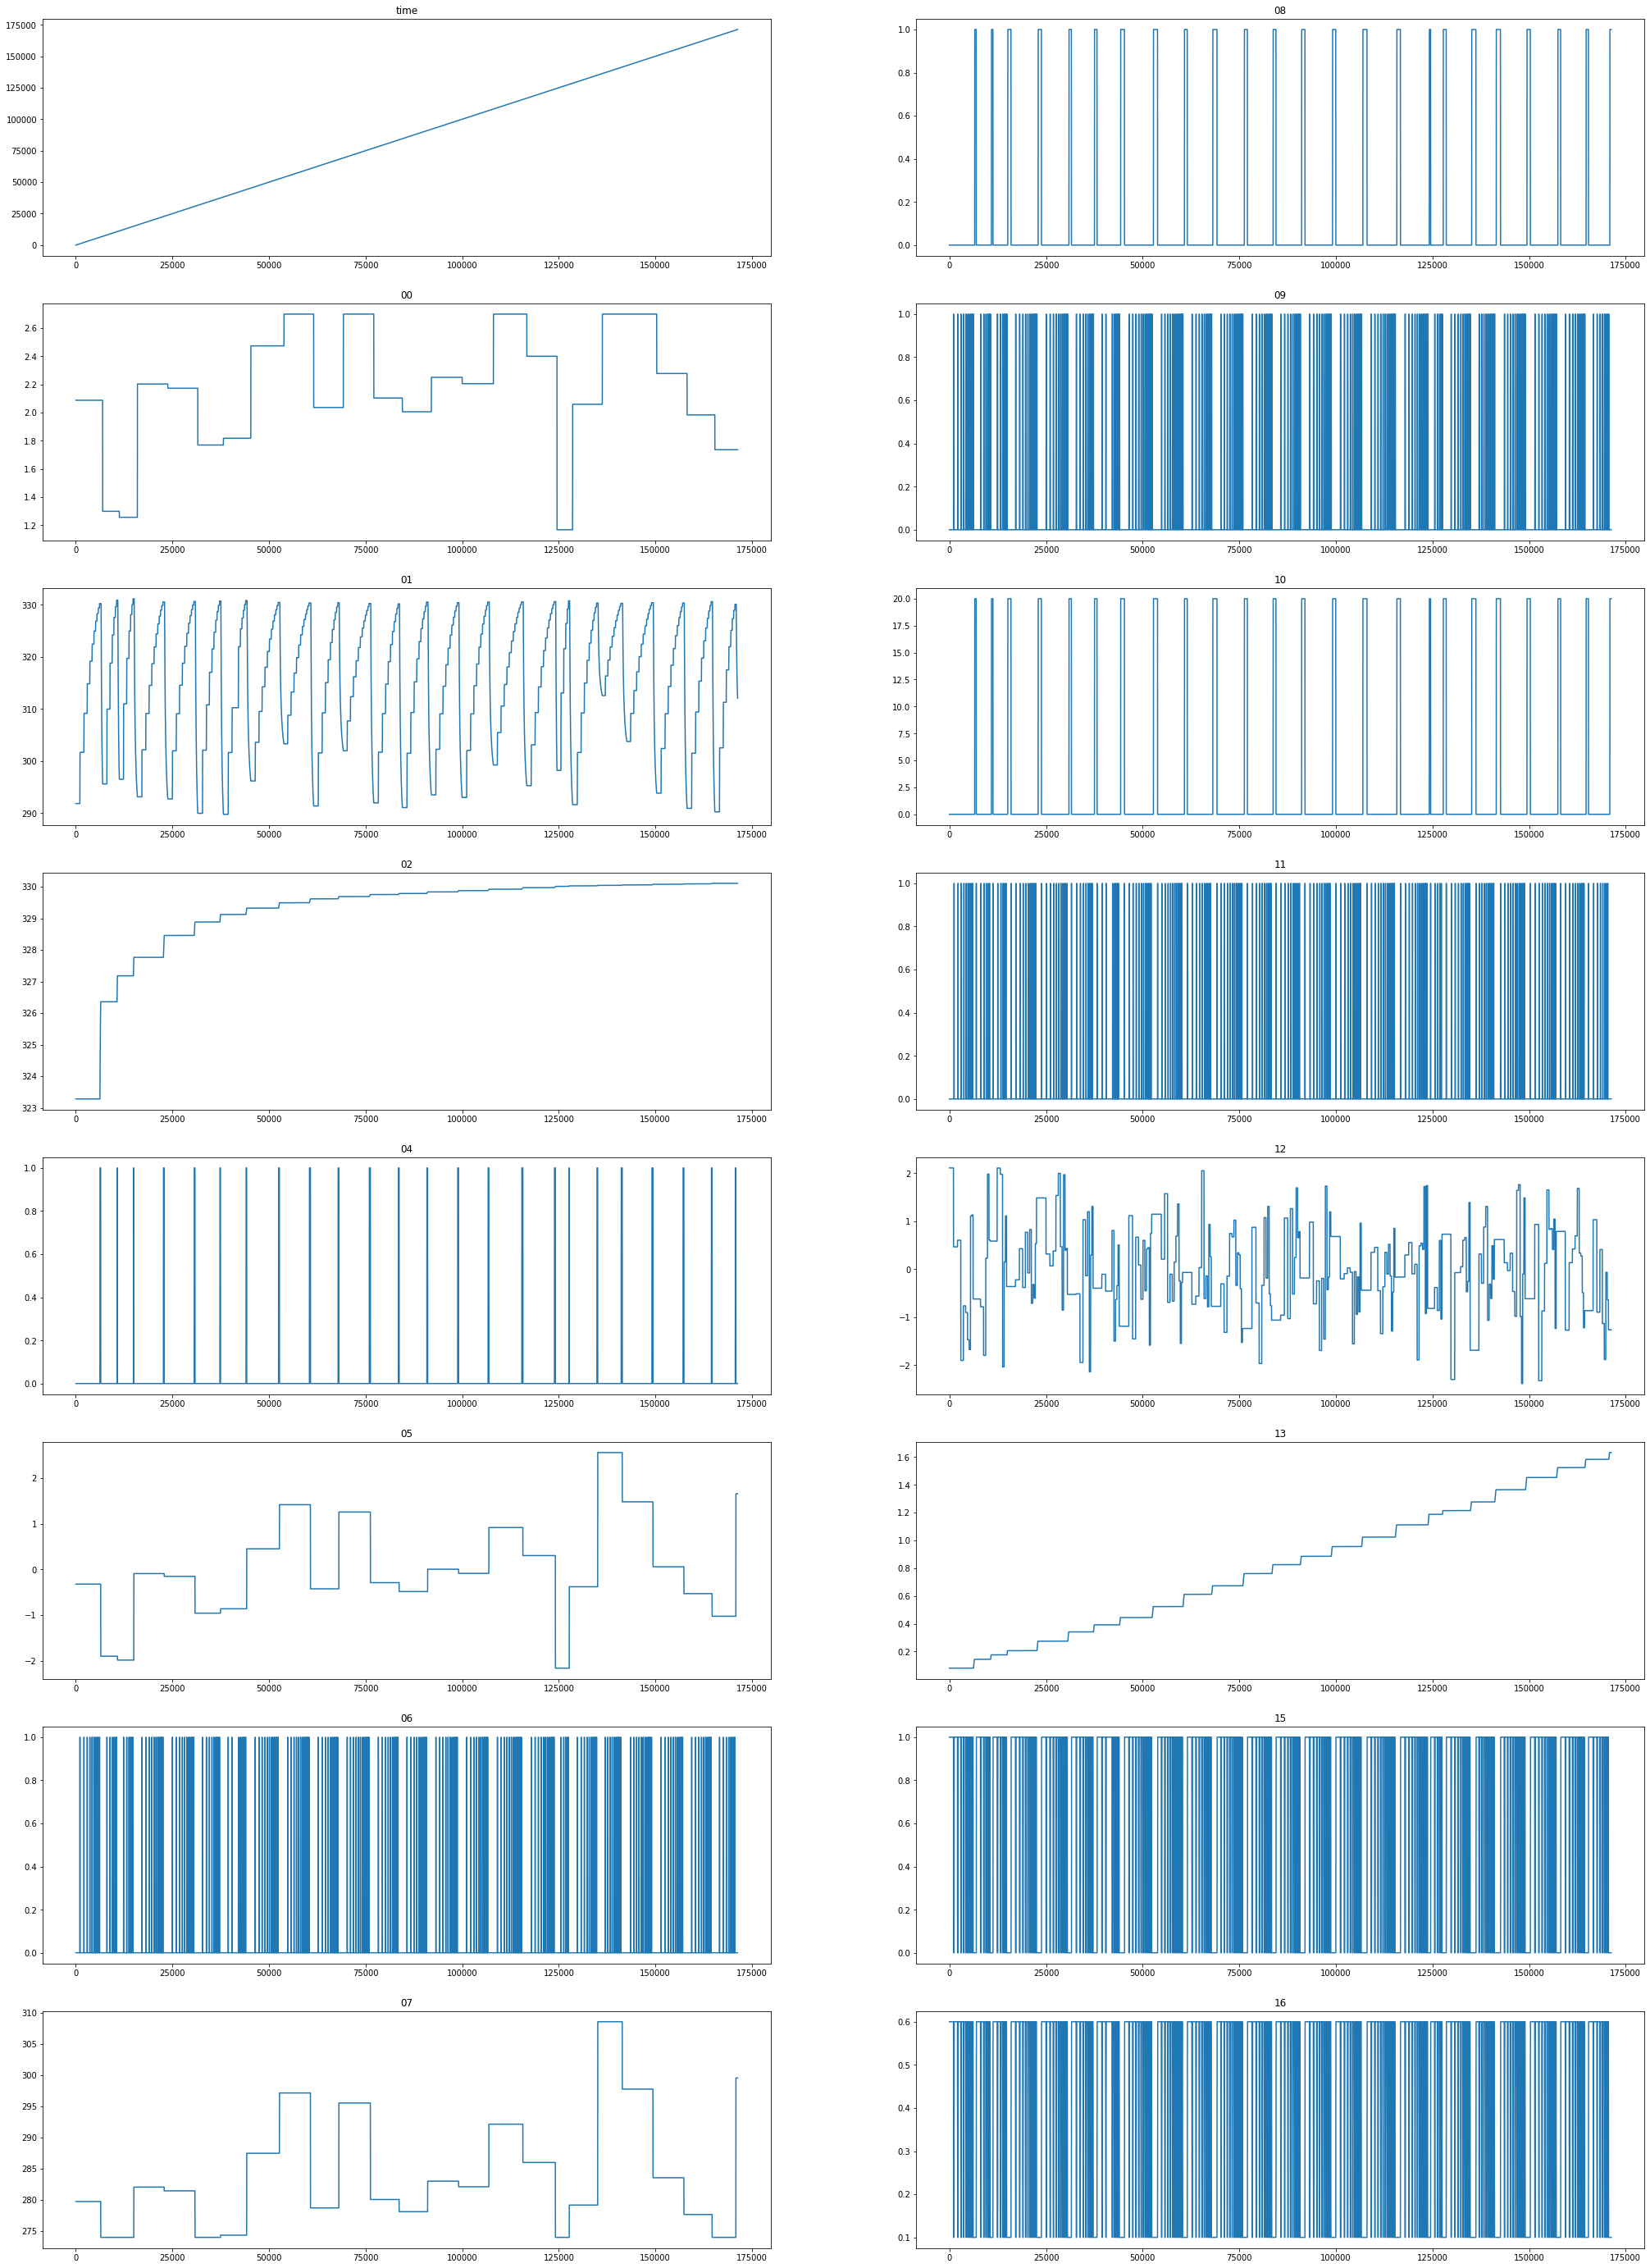

In [141]:
def plot_test(test):
    fig = plt.figure(figsize=(35,50))
    gs = gridspec.GridSpec(8,2)
    for i, col in zip(itertools.product(range(2), range(8)),test.columns):

        ax = plt.subplot(gs[i[1], i[0]])
        fig = plt.plot(test['time'], test[col])
        head = col
        plt.title(head)
plot_test(test0)

In [104]:
columns_oscill = ['00', '01', '05', '07', '12', '17', '18']
columns_cool = ['00', '05', '07', '18']

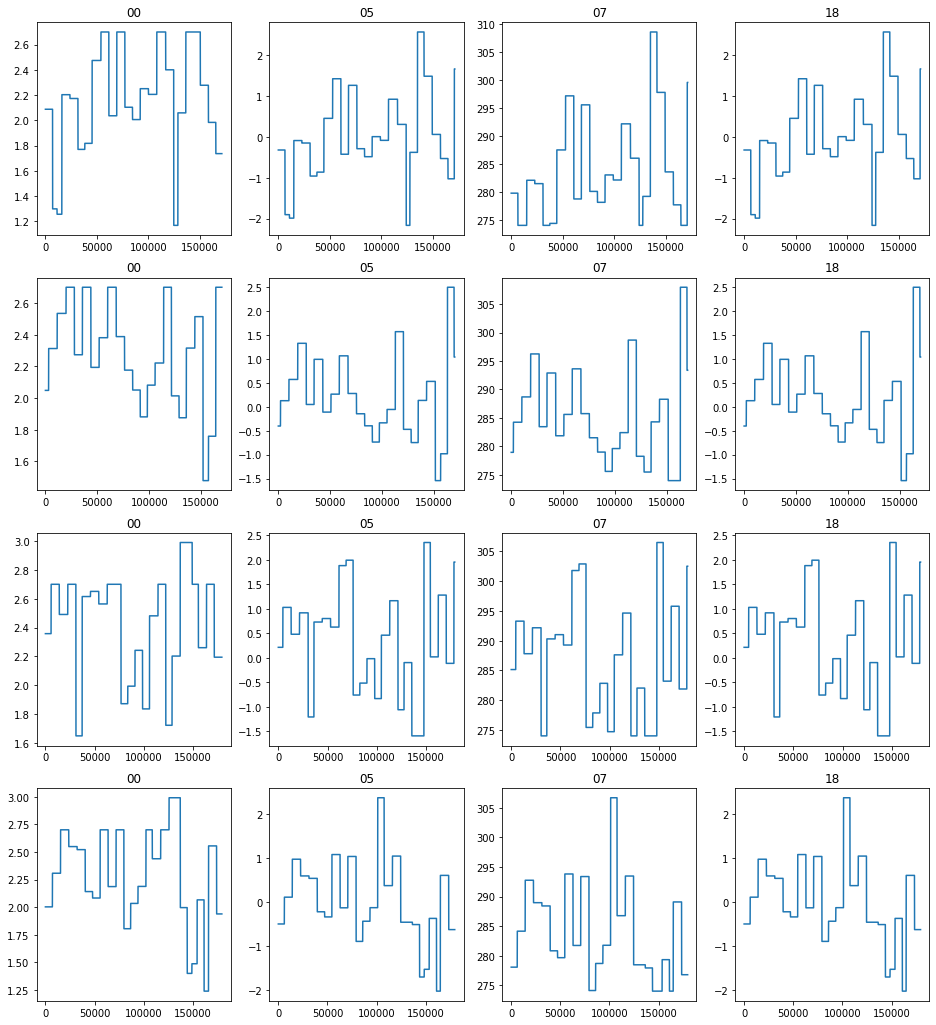

In [106]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))

for i, filename in enumerate(sorted(os.listdir('./data/test_data'))):
    data = pd.read_csv('./data/test_data/' + filename)
    if i == 4:
        break
    else:
        for j, ax in enumerate(axs[i]):
            ax.plot(data['time'], data[columns_cool[j]])
            ax.set_title(columns_cool[j])

In [168]:
# max7, min18, max18, 
def mins1(test):
    arr = [[test[i], i] for i in range(1, len(test) - 1) if test[i-1] == test[i]]
    mean = test.mean()
#     arr = sorted(arr, key = lambda x: abs(x[1]- mean))
#     print(arr)
    arr = np.sort((np.array(arr) - [mean, 0]))
    return arr[0][1]

answers = pd.DataFrame(columns=['time'])

for filename in sorted(os.listdir('./data/test_data')):
    print(filename)
    test_data = pd.read_csv('./data/test_data/' + filename)
#     print(mins1(test_data))
    answers = answers.append({'time' : mins1(test_data['01'])}, ignore_index=True)
#     answers = answers.append({'time' : (test_data['time'][np.abs((mins1(test_data) - test_data['01'].mean())).argmin()])}, ignore_index=True)

00_test.csv
01_test.csv
02_test.csv
03_test.csv
04_test.csv
05_test.csv
06_test.csv
07_test.csv
08_test.csv
09_test.csv
10_test.csv
11_test.csv
12_test.csv
13_test.csv
14_test.csv
15_test.csv
16_test.csv
17_test.csv
18_test.csv
19_test.csv
20_test.csv
21_test.csv
22_test.csv
23_test.csv
24_test.csv
25_test.csv
26_test.csv
27_test.csv
28_test.csv
29_test.csv
30_test.csv
31_test.csv
32_test.csv
33_test.csv
34_test.csv
35_test.csv
36_test.csv
37_test.csv
38_test.csv
39_test.csv
40_test.csv
41_test.csv
42_test.csv
43_test.csv
44_test.csv
45_test.csv
46_test.csv
47_test.csv


In [167]:
np.array([[10, 0], [100, 1], [50, 2]]) - [30, 0]

array([[-20,   0],
       [ 70,   1],
       [ 20,   2]])

In [ ]:
mins_from_1 = [i for i in range(10) if i%2==0]
mins_from_1

In [169]:
answers.round({'time':0}).head(10)

,time
0,1.0
1,9.0
2,1.0
3,1.0
4,250.0
5,10.0
6,1.0
7,12.0
8,6.0
9,13.0


In [147]:
answers.to_csv('submission.csv')

In [151]:
np.abs(test_data['01'] - test_data['01'].mean()).min()

0.0003926695697487048